# 2

## d

### i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
Sigma = np.diag([10**((i-20)/5) for i in range(1,n+1)])
np.random.seed(0)
X = np.array([np.ones(n),np.random.normal(0,1,n)]).T
beta = np.array([1,0.25])
epsilon = np.random.multivariate_normal(np.zeros(n),Sigma)
y = X @ beta + epsilon


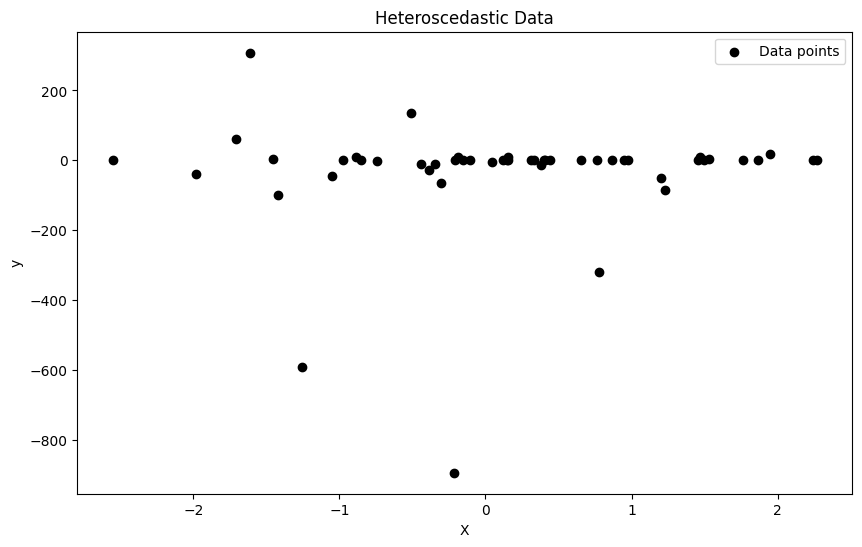

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, color='black', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Heteroscedastic Data')
plt.legend()
plt.show()



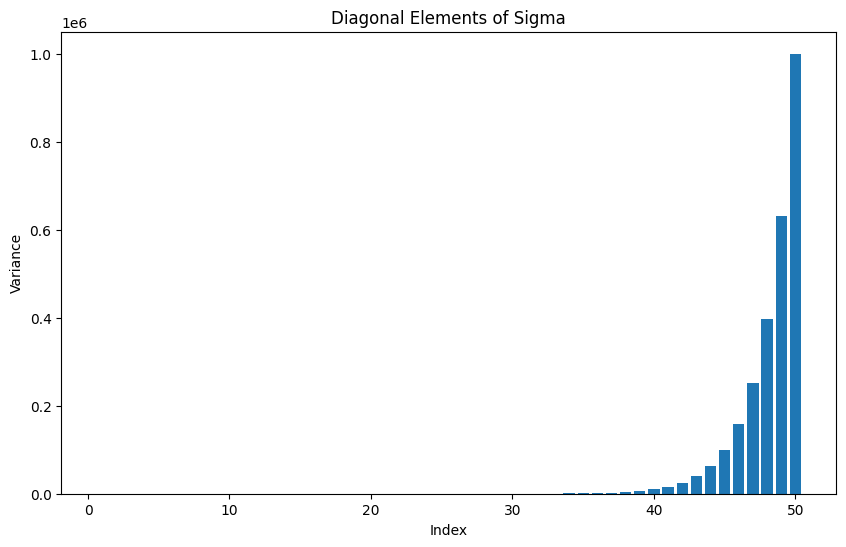

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(1, n+1), np.diag(Sigma))
plt.xlabel('Index')
plt.ylabel('Variance')
plt.title('Diagonal Elements of Sigma')
plt.show()

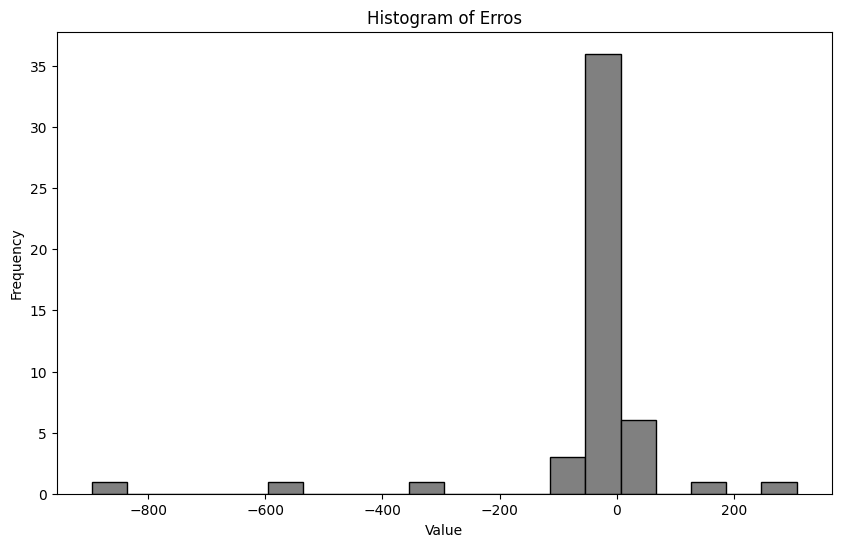

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(epsilon, bins=20, color='gray', edgecolor='black')
plt.xlabel('Value') 
plt.ylabel('Frequency')
plt.title('Histogram of Erros')
plt.show()


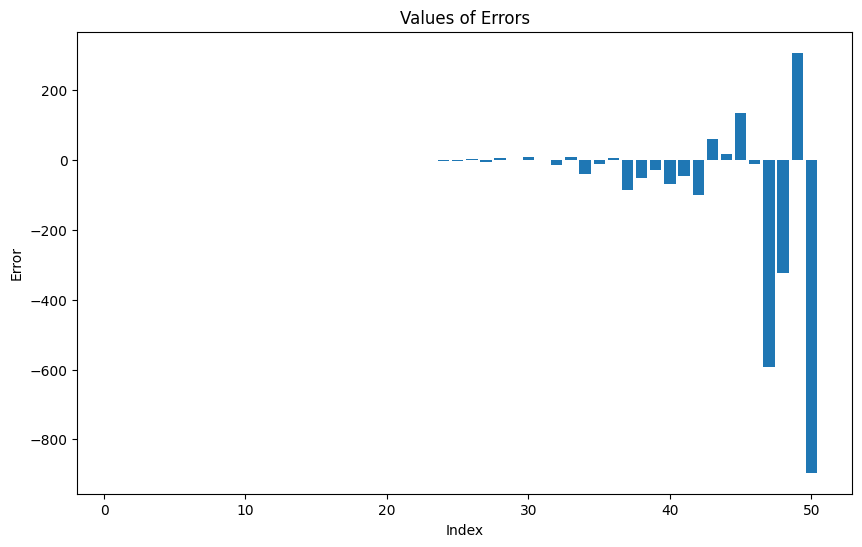

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(1, n+1), epsilon)
plt.xlabel('Index') 
plt.ylabel('Error')
plt.title('Values of Errors')
plt.show()

### ii

In [ ]:
def beta_ordinary(X: np.ndarray, Y: np.ndarray)-> np.ndarray:
    """
    Compute the ordinary least squares estimator.
    
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    Returns:
    beta : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).

    """
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta

def beta_sigma(X: np.ndarray, Y: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
    """
    Compute the generalized least squares estimator considering the covariance matrix Sigma.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    Sigma : np.ndarray
        Covariance matrix of shape (samples, samples) or (n,n). This is the covariance matrix of the errors. 
        It does not assume homoscedasticity thus the values of the diagonal can be different. But any value 
        out of the diagonal must be zero since the errors are uncorrelated.

    
    Returns:
    beta : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    """
    
    Sigma_1 = np.linalg.inv(Sigma)
    beta = np.linalg.inv(X.T @ Sigma_1 @ X ) @ X.T @ Sigma_1 @ Y
    return beta

beta_hat_ordinary = beta_ordinary(X,y)
beta_hat_sigma = beta_sigma(X,y,Sigma)

print("True Beta:", beta)
print("Ordinary Beta:", beta_hat_ordinary)
print("Beta Sigma:", beta_hat_sigma)

print("\nNorms of the differences:")
print("True Beta and Ordinary Beta:", np.linalg.norm(beta - beta_hat_ordinary, ord=2)**2)
print("True Beta and Beta Sigma:", np.linalg.norm(beta - beta_hat_sigma, ord=2)**2)

True Beta: [1.   0.25]
Ordinary Beta: [-34.46344733   6.94756948]
Beta Sigma: [1.01885254 0.24436202]

Norms of the differences:
True Beta and Ordinary Beta: 1302.513533772031
True Beta and Beta Sigma: 0.0003872050262530096


### iii

In [ ]:
import scipy
def p_value_ordinary_least_square(X: np.ndarray, Y: np.ndarray, beta_ordinary_hat: np.ndarray, j: int) -> float:
    """
    Compute the p-value for the j-th coefficient of the ordinary least squares estimator.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    beta_ordinary_hat : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    j : int
        Index of the coefficient to compute the p-value for.
    Returns:
    p_value : float
        p-value for the j-th coefficient.
    """
    
    # Predictions, residuals and other necessary values
    Y_hat = X @ beta_ordinary_hat
    n,p = X.shape
    dof = n - (p)
    errors = (Y - Y_hat)
    beta_j = beta_ordinary_hat[j]

    # Z statistic 
    x_j_var = (np.linalg.inv(X.T @ X))[j,j]
    Z = beta_j / np.sqrt(x_j_var)    
    
    # Estimate of sigma^2
    sigma2_hat = (1/dof)* (errors.T @ errors)
    
    # t statistic and p-value
    t_statistics =  Z / np.sqrt(sigma2_hat)
    t_statistics = np.abs(t_statistics)
    p_value = 2*(1 -  scipy.stats.t.cdf(t_statistics, dof))
    
    return p_value


beta0_hat_ordinary_p_value = p_value_ordinary_least_square(X, y, beta_hat_ordinary,0)
beta1_hat_ordinary_p_value = p_value_ordinary_least_square(X, y, beta_hat_ordinary,1)

print("p-value of ordinary beta_0 =", beta0_hat_ordinary_p_value)
print("p-value of ordinary beta_1 =", beta1_hat_ordinary_p_value)
print("We can not discard the null hypothesis for both coefficients at 5% significance level.")

p-value of ordinary beta_0 = 0.1543599725443663
p-value of ordinary beta_1 = 0.7421602010802748
We can not discard the null hypothesis for both coefficients at 5% significance level.


In [ ]:
# Sanity check with statsmodels
import statsmodels.api as sm
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1095
Date:                Fri, 23 Jan 2026   Prob (F-statistic):              0.742
Time:                        17:54:18   Log-Likelihood:                -325.86
No. Observations:                  50   AIC:                             655.7
Df Residuals:                      48   BIC:                             659.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.4634     23.815     -1.447      0.154     -82.347      13.420
x1             6.9476     20.996      0.331      0.742     -35.268      49.163
==============================================================================
Omnibus:                       66.974   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.548
Skew:                          -3.511   Prob(JB):                    5.81e-129
Kurtosis:                      18.302   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### iv

In [ ]:
def calculate_Z_sigma(X: np.ndarray, Sigma: np.ndarray, Beta_sigma: np.ndarray, j: int) -> float:
    """
    Compute the Z statistic for the j-th coefficient of the generalized least squares estimator.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Sigma : np.ndarray
        Covariance matrix of shape (samples, samples) or (n,n). This is the covariance matrix of the errors. 
        It does not assume homoscedasticity thus the values of the diagonal can be different. But any value 
        out of the diagonal must be zero since the errors are uncorrelated.
    Beta_sigma : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    j : int
        Index of the coefficient to compute the Z statistic for.
    Returns:
    Z : float
        Z statistic for the j-th coefficient.
    """
    Sigma_inv = np.linalg.inv(Sigma)
    den = np.linalg.inv(X.T @ Sigma_inv @ X)
    den = den[j,j]
    Z = Beta_sigma[j]/(np.sqrt(den))
    return Z

Z = calculate_Z_sigma(X, Sigma, beta_hat_sigma, j=0)
print("Z_sigma of Beta_0 =", Z)


Z_sigma of Beta_0 = 73.67232264052195


### v

In [ ]:
def p_value_generalized_least_square(X: np.ndarray, Y: np.ndarray, Sigma: np.ndarray, beta_ordinary_hat: np.ndarray, j: int) -> float:
    """
    Compute the p-value for the j-th coefficient of the generalized least squares estimator.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    Sigma : np.ndarray
        Covariance matrix of shape (samples, samples) or (n,n).
    beta_ordinary_hat : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    j : int
        Index of the coefficient to compute the p-value for.
    Returns:
    p_value : float
        p-value for the j-th coefficient.
    """
    
    # Predictions, residuals and other necessary values
    Y_hat = X @ beta_ordinary_hat
    n,p = X.shape
    dof = n - (p)
    errors = (Y - Y_hat)

    # Z statistic 
    Z_sigma = calculate_Z_sigma(X, Sigma, beta_hat_sigma,j)
    
    # Estimate of sigma^2
    inverse_Sigma = np.linalg.inv(Sigma)
    sigma2_hat = (1/dof)* (errors.T @ inverse_Sigma @ errors)
    
    # t statistic and p-value
    Z =  Z_sigma / np.sqrt(sigma2_hat)
    Z = np.abs(Z)
    p_value = 2*(1 - scipy.stats.norm.cdf(Z))
    
    return p_value

p_value_beta0_sigma = p_value_generalized_least_square(X,y,Sigma,beta_hat_sigma,0)
p_value_beta1_sigma = p_value_generalized_least_square(X,y,Sigma,beta_hat_sigma,1)

print(p_value_beta0_sigma)
print(p_value_beta1_sigma)

0.0
0.0
